<a href="https://colab.research.google.com/github/aqsa75/Llava-Cornell-Project/blob/main/LLava3_Improvement_Project_Cornell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Sonic Workshop: Intro to LLava**

In [ ]:
#installing packages
!pip install -q transformers==4.36.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install git+https://github.com/Imageomics/pybioclip

  Cloning https://github.com/Imageomics/pybioclip to /tmp/pip-req-build-4kmcei4v
  Running command git clone --filter=blob:none --quiet https://github.com/Imageomics/pybioclip /tmp/pip-req-build-4kmcei4v
  Resolved https://github.com/Imageomics/pybioclip to commit 71d8a63f28ca303e9f7d71672dbe97ffc99c88fe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import torch.nn.functional as F
from transformers import BitsAndBytesConfig
from bioclip import TreeOfLifeClassifier, Rank
from PIL import Image

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##BioCLIP

In [ ]:
classifier = TreeOfLifeClassifier()
predictions = classifier.predict("/content/drive/MyDrive/test_images/flamingo.png", Rank.SPECIES)

prediction = predictions[0]
common_name = prediction["common_name"]
print(common_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


txt_emb_species.npy:   0%|          | 0.00/787M [00:00<?, ?B/s]

txt_emb_species.json:   0%|          | 0.00/65.7M [00:00<?, ?B/s]

Greater Flamingo


##LLaVa

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

#Connect Google Colab to Your Drive Folder to Import Images Directly
##**Important**: Images you upload here will be deleted when the session ends but if you connect to your drive your images are safe

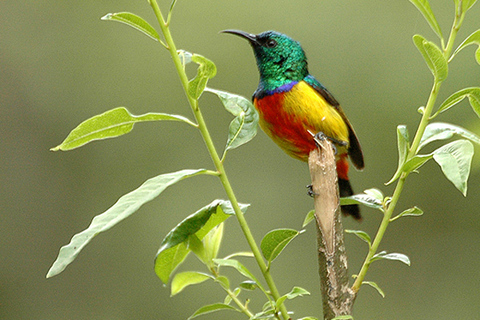

In [ ]:
img = Image.open('/content/drive/MyDrive/test_images/regalsunbird.jpg')
img

In [ ]:
def checkAnimal(questionSpecies, correctSpecies):
    animalQuestion = "True or false answers only, are the two animals synonyms?"
    prompt = f'USER: <image>\n{Question3}?\nASSISTANT:'
    outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    output = outputs[0]['generated_text']
    return output

##How to ask LLava?
You can ask questions to LLava through text about the image, just like you do with ChatGPT.

In [ ]:
Question ="What is the color of this hummingbird?"
prompt = f'USER: <image>\n{Question}?\nASSISTANT:'
outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print("output: ", outputs)

output:  [{'generated_text': 'USER:  \nWhat is the color of this hummingbird??\nASSISTANT: The color of this hummingbird is green, red, and yellow.'}]


##Our Solution


In [ ]:
#Question1 = "Whats the weather in San Francisco?"
#Question1 = "What animal is this?"
Question1 = "does this hummingbird live in australia?"
prompt = f'USER: <image>\n{Question1}?\nASSISTANT:'
outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
output = outputs[0]['generated_text']


Question2 ="Yes or No anwsers only, is there an animal in the provided photo."
prompt = f'USER: <image>\n{Question2}?\nASSISTANT:'
outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
output = outputs[0]['generated_text']
print(outputs)

if  "ASSISTANT: Yes" in output:
    #Question3 ="list all questions asked during this session"
    Question3 ="is the anwser to this question dependant on or involve any animal "+Question1
    #print(Question1)
    #Question3 ="Yes or No anwsers only, is the species of the animal in the photo Neccessary to anwser Question1?"
    prompt = f'USER: <image>\n{Question3}?\nASSISTANT:'
    outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    output = outputs[0]['generated_text']
    print(output)
    if  "ASSISTANT: Yes" in output:
        print("BioClip")
        classifier = TreeOfLifeClassifier()
        predictions = classifier.predict("/content/drive/MyDrive/test_images/regalsunbird.jpg", Rank.SPECIES)
        prediction = predictions[0]
        print(prediction["common_name"])
        Question4 ="The animal in the image is a "+prediction['common_name']+". Use this animal to anwser the question "+Question1
        prompt = f'USER: <image>\n{Question4}?\nASSISTANT:'
        outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
        output = outputs[0]['generated_text']
        print(outputs)

    else:
        print("BioClip not needed")
        prompt = f'USER: <image>\n{Question1}?\nASSISTANT:'
        outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
        output = outputs[0]['generated_text']
        print(outputs)

else:
    print("No Animal in Provided photo")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


[{'generated_text': 'USER:  \nYes or No anwsers only, is there an animal in the provided photo.?\nASSISTANT: Yes'}]
USER:  
is the anwser to this question dependant on or involve any animal does this hummingbird live in australia??
ASSISTANT: Yes, the answer to this question is dependent on or involves an animal. The hummingbird in the image is a colorful bird with a green, red, and yellow body. It is perched on a tree branch, which suggests that it lives in an environment with trees and vegetation. The presence of a hummingbird in the image indicates that it is not native to Australia, as the country is home to a variety of bird species, but it is not possible to determine the exact location of the hummingbird based on the image alone.
BioClip
Regal Sunbird
[{'generated_text': 'USER:  \nThe animal in the image is a Regal Sunbird. Use this animal to anwser the question does this hummingbird live in australia??\nASSISTANT: No, the Regal Sunbird does not live in Australia. It is native t

In [ ]:
def main(img, prompt):

  print(img)

  pic = Image.open(img)


  Question2 ="Yes or No anwsers only, is there an animal in the provided photo."
  prompt1 = f'<image>\n{Question2}'
  outputs = pipe(pic, prompt=prompt1, generate_kwargs={"max_new_tokens": 200})
  animalCheck = outputs[0]['generated_text']
  print(animalCheck)

  if "Yes" in animalCheck:
    relevanceCheck = "Is the anwser to this question dependent on or involve any animal? " + prompt
    relevancePrompt = f'<image>\n{relevanceCheck}'
    outputs_1 = pipe(pic, prompt=relevancePrompt, generate_kwargs={"max_new_tokens": 200})
    relevanceCheck = outputs[0]['generated_text']
    print(relevanceCheck)

    if "Yes" in relevanceCheck:
      classifier = TreeOfLifeClassifier()
      predictions = classifier.predict(img, Rank.SPECIES)
      prediction = predictions[0]['common_name']
      print(prediction)

      outputQuestion = "The animal in the image is a " + prediction + ". Use this animal to anwser the question " + prompt
      outputPrompt = f'USER: <image>\n{outputQuestion}?\nASSISTANT:'
      outputs_2 = pipe(pic, prompt=outputPrompt, generate_kwargs={"max_new_tokens": 200})
      output = outputs_2[0]['generated_text']
      print(output)

    else:
      prompt = f'USER: <image>\n{Question1}?\nASSISTANT:'
      outputs = pipe(pic, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
      output = outputs[0]['generated_text']
      print(output)

  else:
    print("No Animal in Provided photo")


main('/content/drive/MyDrive/test_images/buttfly.jpg', "can this spider fly?")

/content/drive/MyDrive/test_images/buttfly.jpg

Yes or No anwsers only, is there an animal in the provided photo. Yes.

Yes or No anwsers only, is there an animal in the provided photo. Yes.
monarch butterfly
USER:  
The animal in the image is a monarch butterfly. Use this animal to anwser the question can this spider fly??
ASSISTANT: No, the spider in the image cannot fly. The animal is a monarch butterfly, which is a type of butterfly, not a spider. Butterflies are known for their ability to fly, while spiders are not capable of flight.
